In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import median_abs_deviation

# read in data

In [2]:
adata = sc.read_h5ad('../merge_2022-23_scdata/7.seurat_obj.h5ad')

adata.obs['clusters'] = pd.Categorical(adata.obs['seurat_clusters'])
adata.obs['sp'] = adata.obs.index.map(lambda x: 'midgut rep1' if x.split('_')[1] == '1' else 'midgut rep2')

# add doublet info
adata.obs['doublet_detect'] = adata.obs.apply(
    lambda x: x['DF.classifications_0.25_0.09_322'] if x['DF.classifications_0.25_0.09_322'] != 'NA' else x['DF.classifications_0.25_0.09_118'],
    axis=1
)

adata

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 11012 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.9', 'seurat_clusters', 'pANN_0.25_0.09_322', 'DF.classifications_0.25_0.09_322', 'pANN_0.25_0.09_118', 'DF.classifications_0.25_0.09_118', 'integrated_snn_res.0.9', 'clusters', 'sp', 'doublet_detect'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [4]:
len(adata.obs[adata.obs['DF.classifications_0.25_0.09_118'] == 'Singlet'])

2839

In [5]:
len(adata.obs[adata.obs['DF.classifications_0.25_0.09_322'] == 'Singlet'])

7733

In [10]:
# sc.pp.calculate_qc_metrics(
#     adata, inplace=True, percent_top=[20], log1p=True
# )
# adata

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


AnnData object with n_obs × n_vars = 11012 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.9', 'seurat_clusters', 'pANN_0.25_0.09_322', 'DF.classifications_0.25_0.09_322', 'pANN_0.25_0.09_118', 'DF.classifications_0.25_0.09_118', 'integrated_snn_res.0.9', 'clusters', 'sp', 'doublet_detect', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes'
    var: 'features', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [3]:
adata_sgl = adata[adata.obs['doublet_detect'] == 'Singlet']

adata_sgl.obs['batch'] = adata_sgl.obs.index.map(lambda x: f'batch_' + x.split('_')[1])

adata_sgl

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/tmp/ipykernel_90445/1672644257.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sgl.obs['batch'] = adata_sgl.obs.index.map(lambda x: f'batch_' + x.split('_')[1])


AnnData object with n_obs × n_vars = 10572 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.9', 'seurat_clusters', 'pANN_0.25_0.09_322', 'DF.classifications_0.25_0.09_322', 'pANN_0.25_0.09_118', 'DF.classifications_0.25_0.09_118', 'integrated_snn_res.0.9', 'clusters', 'sp', 'doublet_detect', 'batch'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [ ]:
len(adata_sgl.obs[adata_sgl.obs['DF.classifications_0.25_0.09_322'] == 'Singlet'])

10572

In [4]:
umap = pd.DataFrame(adata.obsm['X_umap'], columns=['umap1', 'umap2'], index=adata.obs.index)
umap

,umap1,umap2
AAACCCAAGACTGTTC-1_1,1.630285,-3.543174
AAACCCAAGAGTGGCT-1_1,4.874003,-11.868476
AAACCCAAGATCACCT-1_1,0.358836,-5.657500
AAACCCAAGCCAACCC-1_1,-1.270183,0.484189
AAACCCAAGCTCATAC-1_1,-1.689135,-1.627881
...,...,...
TTTGGAGGTTCCTACC-1_2,0.435960,-3.901911
TTTGGTTCAGACATCT-1_2,0.552705,0.550809
TTTGGTTCATTCTTCA-1_2,-0.098284,-0.289350
TTTGTTGAGTAGTGCG-1_2,-0.803139,-0.980627


In [5]:
umap.to_csv('./umap.csv')

# replot

## QC

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


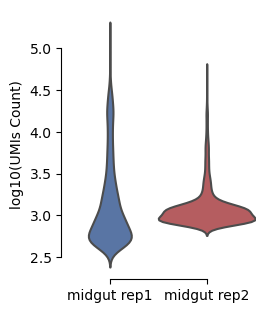

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5, 3.5))

c = sns.color_palette('deep')

sns.violinplot(
    x=adata.obs['sp'], 
    y=np.log10(adata.obs['nCount_RNA']),
    palette=[c[0], c[3]],
    inner=None,
    width=1,
    ax=ax
)

ax.set_ylabel('log10(UMIs Count)')
ax.set_xlabel('')

sns.despine(top=True, right=True, trim=100)

plt.savefig('./plots/f1.qc.umi.png', dpi=600, bbox_inches='tight')

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


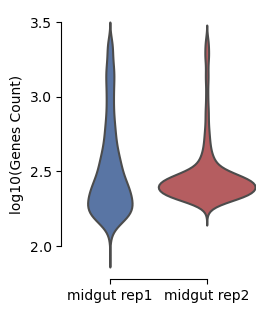

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5, 3.5))

c = sns.color_palette('deep')

sns.violinplot(
    x=adata.obs['sp'], 
    y=np.log10(adata.obs['nFeature_RNA']),
    palette=[c[0], c[3]],
    inner=None,
    width=1,
    ax=ax
)

ax.set_ylabel('log10(Genes Count)')
ax.set_yticks([2, 2.5, 3, 3.5])

ax.set_xlabel('')

sns.despine(top=True, right=True, trim=100)

plt.savefig('./plots/f1.qc.rna.png', dpi=600, bbox_inches='tight')

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


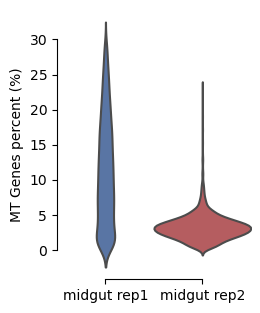

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5, 3.5))

c = sns.color_palette('deep')

sns.violinplot(
    x=adata.obs['sp'], 
    y=adata.obs['percent.mt'],
    palette=[c[0], c[3]],
    inner=None,
    width=1,
    ax=ax
)

ax.set_ylabel('MT Genes percent (%)')
ax.set_xlabel('')

sns.despine(top=True, right=True, trim=100)
plt.savefig('./plots/f1.qc.mtg.png', dpi=600, bbox_inches='tight')

## doublet

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


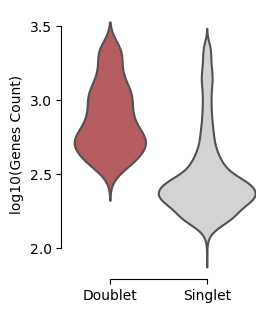

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5, 3.5))

c = sns.color_palette('deep')

sns.violinplot(
    x=adata.obs['doublet_detect'], 
    y=np.log10(adata.obs['nFeature_RNA']),
    palette=[c[3], 'lightgrey'],
    order=['Doublet', 'Singlet'],
    inner=None,
    width=1,
    ax=ax
)

ax.set_ylabel('log10(Genes Count)')
ax.set_yticks([2, 2.5, 3, 3.5])

ax.set_xlabel('')

sns.despine(top=True, right=True, trim=100)

plt.savefig('./plots/f1.qc.doublet.png', dpi=600, bbox_inches='tight')

In [ ]:
adata.obs['doublet_detect'].value_counts().to_dict()

{'Singlet': 10572, 'Doublet': 440}

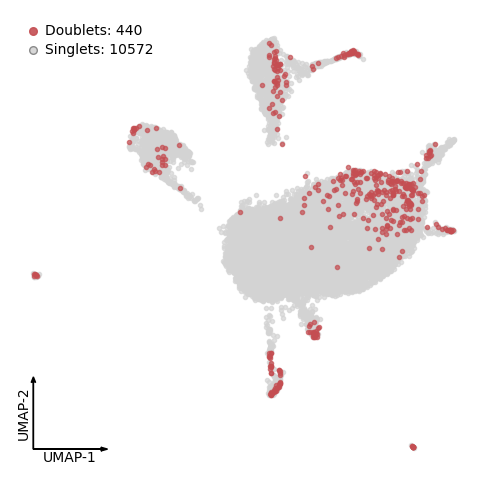

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

c = sns.color_palette('deep')

pdf = umap[adata.obs['doublet_detect'] == 'Singlet']
l1, = ax.plot(pdf['umap1'], pdf['umap2'], '.', color='lightgrey', alpha=0.7) #e7e7e7

pdf = umap[adata.obs['doublet_detect'] == 'Doublet']
l2, = ax.plot(pdf['umap1'], pdf['umap2'], '.', color=c[3], alpha=0.7)

ax.arrow(
    -12, -12, 0, 3.5, 
    width=0.01, head_width=0.2, overhang=0.3, 
    color='k', zorder=10)
ax.arrow(
    -12, -12, 3, 0, 
    width=0.01, head_width=0.2, overhang=0.3,
    color='k', zorder=10)

ax.set_axis_off()

ax.text(-10.4, -12.1, 'UMAP-1', ha='center', va='top')
ax.text(-12.1, -10.1, 'UMAP-2', ha='right', va='center', rotation=90)

doublet_ct_dct = adata.obs['doublet_detect'].value_counts().to_dict()

doublet_ct = doublet_ct_dct['Doublet']
ax.plot(-12, 10, '.', color=c[3], mec=c[3], ms=11, alpha=0.9)
ax.text(-11.5, 10, f'Doublets: {doublet_ct}', ha='left', va='center')

singlet_ct = doublet_ct_dct['Singlet']
ax.plot(-12, 9, '.', color='lightgrey', mec='grey', ms=11, alpha=0.9)
ax.text(-11.5, 9, f'Singlets: {singlet_ct}', ha='left', va='center')

plt.savefig('./plots/f1.qc.doublet.umap.png', dpi=600, bbox_inches='tight')

## batch

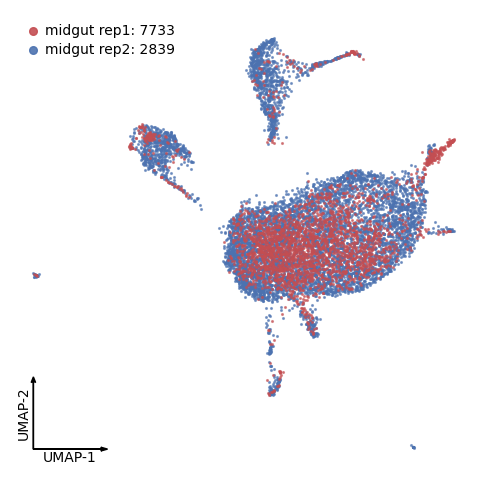

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

c = sns.color_palette('deep')

pdf = umap[
    umap.index.isin(adata_sgl.obs.index)
][adata_sgl.obs['sp'] == 'midgut rep1']

r1_ct = len(pdf)

l1, = ax.plot(pdf['umap1'], pdf['umap2'], '.', color=c[0], alpha=0.6, ms=2.5) #e7e7e7

pdf = umap[
    umap.index.isin(adata_sgl.obs.index)
][adata_sgl.obs['sp'] == 'midgut rep2']

r2_ct = len(pdf)

l2, = ax.plot(pdf['umap1'], pdf['umap2'], '.', color=c[3], alpha=0.6, ms=2.5)

ax.arrow(
    -12, -12, 0, 3.5, 
    width=0.01, head_width=0.2, overhang=0.3, 
    color='k', zorder=10)
ax.arrow(
    -12, -12, 3, 0, 
    width=0.01, head_width=0.2, overhang=0.3,
    color='k', zorder=10)

ax.set_axis_off()

ax.text(-10.4, -12.1, 'UMAP-1', ha='center', va='top')
ax.text(-12.1, -10.1, 'UMAP-2', ha='right', va='center', rotation=90)

ax.plot(-12, 10, '.', color=c[3], mec=c[3], ms=11, alpha=0.9)
ax.text(-11.5, 10, f'midgut rep1: {r1_ct}', ha='left', va='center')

ax.plot(-12, 9, '.', color=c[0], mec=c[0], ms=11, alpha=0.9)
ax.text(-11.5, 9, f'midgut rep2: {r2_ct}', ha='left', va='center')

plt.savefig('./plots/f1.qc.rep.umap.png', dpi=600, bbox_inches='tight')

## umap

### marker genes

In [8]:
mark_genes = [
    [13, 'ISC/EB-p', 'LOC5567214'], # 表达溶菌酶，表达更多的转录因子
    [9, 'ISC/EB-m', 'LOC110676293'], # 表达溶菌酶
    [10, 'ISC/EB-d', 'LOC110676293'], # 溶菌酶表达减弱，向EC分化

    [11, 'EC-Na', 'LOC5570922'], # 神经细胞粘附，钠离子交换
    [14, 'EC-AA', 'LOC5570613'], # 氨基酸转运    
    
    [4, 'EC-Trypsin 5G1', 'LOC5578506'], # 无机盐转运，分泌蛋白酶
    [5, 'EC-Trypsin 5G1', 'LOC5578506'], # 无机盐转运，分泌蛋白酶
    [2, 'EC-Trypsin 5G1', 'LOC5578506'], # 分泌蛋白酶

    [0, 'EC', 'LOC5571828'], # 分泌蛋白酶
    [1, 'EC', 'LOC5571828'], # 分泌蛋白酶
    [3, 'EC', 'LOC5571828'], # 无机盐转运，分泌蛋白酶
    [8, 'EC', 'LOC5571828'], # 分泌蛋白酶
    
    [7, 'EC-S', 'LOC5565453'], # 分麦芽糖酶
    [12, 'EE', 'LOC5575886'], # 信号肽
    [6, 'VM', 'LOC5580168'],
    [15, 'Unkn', 'LOC5570587'],
]
mgd = pd.DataFrame(mark_genes, columns=['seurat_clusters', 'label', 'mark_genes'])
mgd.to_csv('marker_genes.csv', index=False)
mgd

,seurat_clusters,label,mark_genes
0,13,ISC/EB-p,LOC5567214
1,9,ISC/EB-m,LOC110676293
2,10,ISC/EB-d,LOC110676293
3,11,EC-Na,LOC5570922
4,14,EC-AA,LOC5570613
5,4,EC-Trypsin 5G1,LOC5578506
6,5,EC-Trypsin 5G1,LOC5578506
7,2,EC-Trypsin 5G1,LOC5578506
8,0,EC,LOC5571828
9,1,EC,LOC5571828


In [9]:
mgd = pd.read_csv('marker_genes.csv')

clust_ord = {}

order = 0
last_lb = ''
for clust, lb in mgd[['seurat_clusters', 'label']].values:
    if lb != last_lb:
        order += 1
        last_lb = lb
        clust_ord[clust] = order
    else:
        clust_ord[clust] = order

clust_ord

{13: 1,
 9: 2,
 10: 3,
 11: 4,
 14: 5,
 4: 6,
 5: 6,
 2: 6,
 0: 7,
 1: 7,
 3: 7,
 8: 7,
 7: 8,
 12: 9,
 6: 10,
 15: 11}

In [10]:
dict(mgd[['seurat_clusters', 'label']].drop_duplicates().values)

{13: 'ISC/EB-p',
 9: 'ISC/EB-m',
 10: 'ISC/EB-d',
 11: 'EC-Na',
 14: 'EC-AA',
 4: 'EC-Trypsin 5G1',
 5: 'EC-Trypsin 5G1',
 2: 'EC-Trypsin 5G1',
 0: 'EC',
 1: 'EC',
 3: 'EC',
 8: 'EC',
 7: 'EC-S',
 12: 'EE',
 6: 'VM',
 15: 'Unkn'}

In [11]:
adata_sgl.obs['label'] = adata_sgl.obs['seurat_clusters'].map(lambda x: dict(mgd[['seurat_clusters', 'label']].values)[x])
adata_sgl.obs['order'] = adata_sgl.obs['seurat_clusters'].map(lambda x: clust_ord[x])
adata_sgl.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.9,seurat_clusters,pANN_0.25_0.09_322,DF.classifications_0.25_0.09_322,pANN_0.25_0.09_118,DF.classifications_0.25_0.09_118,integrated_snn_res.0.9,clusters,sp,doublet_detect,batch,label,order
AAACCCAAGACTGTTC-1_1,Aedes_midgut,576.0,164,11.656442,1,2,0.003102,Singlet,NaN,NA,2,2,midgut rep1,Singlet,batch_1,EC-Trypsin 5G1,6
AAACCCAAGATCACCT-1_1,Aedes_midgut,1154.0,368,14.008942,10,7,0.292658,Singlet,NaN,NA,7,7,midgut rep1,Singlet,batch_1,EC-S,8
AAACCCAAGCCAACCC-1_1,Aedes_midgut,1027.0,235,13.842282,0,0,0.061013,Singlet,NaN,NA,0,0,midgut rep1,Singlet,batch_1,EC,7
AAACCCAAGCTCATAC-1_1,Aedes_midgut,555.0,172,12.598425,0,0,0.006205,Singlet,NaN,NA,0,0,midgut rep1,Singlet,batch_1,EC,7
AAACCCAAGCTGGCTC-1_1,Aedes_midgut,472.0,175,21.202003,1,4,0.037229,Singlet,NaN,NA,4,4,midgut rep1,Singlet,batch_1,EC-Trypsin 5G1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGGTTCCTACC-1_2,Aedes_midgut,1210.0,287,4.120444,2,7,NaN,NA,0.098592,Singlet,7,7,midgut rep2,Singlet,batch_2,EC-S,8
TTTGGTTCAGACATCT-1_2,Aedes_midgut,1215.0,285,4.405980,0,3,NaN,NA,0.076056,Singlet,3,3,midgut rep2,Singlet,batch_2,EC,7
TTTGGTTCATTCTTCA-1_2,Aedes_midgut,795.0,233,5.357143,0,1,NaN,NA,0.008451,Singlet,1,1,midgut rep2,Singlet,batch_2,EC,7
TTTGTTGAGTAGTGCG-1_2,Aedes_midgut,828.0,229,2.816901,0,1,NaN,NA,0.019718,Singlet,1,1,midgut rep2,Singlet,batch_2,EC,7


In [12]:
ord_markers = []
for i in mgd['mark_genes']:
    for m in i.split(', '):
        if not m in ord_markers:
            ord_markers.append(m)
            
ord_markers

['LOC5567214',
 'LOC110676293',
 'LOC5570922',
 'LOC5570613',
 'LOC5578506',
 'LOC5571828',
 'LOC5565453',
 'LOC5575886',
 'LOC5580168',
 'LOC5570587']

In [177]:
# ord_markers = [
#     'LOC5567214',
#     'LOC5571084',
#     'LOC5574966',
#     'LOC110676293', 'LOC5563695',
#     'LOC5570613', 
#     'LOC5564333', 'LOC5570922',
#     'LOC5568583',
#     'LOC5571828',
#     'LOC5567964',
#     'LOC5565453',
#     'LOC5573874', 'LOC5575886',
#     'LOC5580173', 'LOC5580231', 'LOC5580168',    
# ]

In [13]:
markn = pd.read_csv('./marker_genes.des.csv', index_col=0)
markn = mmarkg[['Symbol', 'Aliases', 'description']].loc[ord_markers].drop_duplicates()
markn['gname'] = markn['Aliases'].map(lambda x: x.split(', ')[-1])
markn['gname'] = markn['gname'].map(lambda x: 'NPF' if x == 'NPF_AEDAE' else x)
markn

,Symbol,Aliases,description,gname
LOC5567214,LOC5567214,"AaeL_AAEL000864, AAEL000864",transcription factor SOX-3,AAEL000864
LOC110676293,LOC110676293,"AaeL_AAEL003723, AAEL003723, LYSC11",lysozyme-like,LYSC11
LOC5570922,LOC5570922,"AaeL_AAEL001503, AAEL001503, NHE3",sodium/hydrogen exchanger 3,NHE3
LOC5570613,LOC5570613,"AaeL_AAEL008424, AAEL008424, NAAT",sodium-dependent nutrient amino acid transport...,NAAT
LOC5578506,LOC5578506,"AaeL_AAEL013707, AAEL013707",trypsin 5G1-like,AAEL013707
LOC5571828,LOC5571828,"AaeL_AAEL001690, AAEL001690",chymotrypsin-2,AAEL001690
LOC5565453,LOC5565453,"AaeL_AAEL000667, AAEL000667",probable maltase,AAEL000667
LOC5575886,LOC5575886,"AaeL_AAEL002733, AAEL002733, AeaNPF, NPF, NPF_...",neuropeptide F,NPF
LOC5580168,LOC5580168,"AaeL_AAEL002565, AAEL002558, AAEL002565",twitchin,AAEL002565
LOC5570587,LOC5570587,"AaeL_AAEL008397, AAEL008397, GPXH2, GPx",probable glutathione peroxidase 2,GPx


In [15]:
len(ord_markers)

10

In [16]:
labels = list(adata_sgl.obs[['order', 'label']].drop_duplicates().sort_values(['order'])['label'])
labels

['ISC/EB-p',
 'ISC/EB-m',
 'ISC/EB-d',
 'EC-Na',
 'EC-AA',
 'EC-Trypsin 5G1',
 'EC',
 'EC-S',
 'EE',
 'VM',
 'Unkn']

In [17]:
adata_sgl.obs['order'] = pd.Categorical(adata_sgl.obs['order'])

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cm

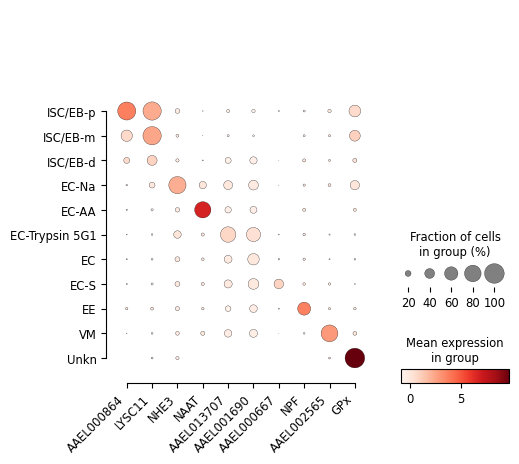

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sc.pl.dotplot(
    adata_sgl, 
    ord_markers, 
    # categories_order= [i + 1 for i in range(len(ord_markers))],
    groupby='order',
    use_raw=False, 
    dendrogram=False,
    # cmap='Blues',
    show=False,
)

axm = ax['mainplot_ax']

axm.set_xticklabels(markn['gname'], rotation=45, ha='right')
axm.set_yticklabels(labels)

sns.despine(top=True, right=True, trim=1, ax=axm)

plt.savefig('./plots/f2.dotplot.png', dpi=600, bbox_inches='tight')

In [183]:
adata_sgl.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.9,seurat_clusters,pANN_0.25_0.09_322,DF.classifications_0.25_0.09_322,pANN_0.25_0.09_118,DF.classifications_0.25_0.09_118,integrated_snn_res.0.9,clusters,sp,doublet_detect,batch,label,order
AAACCCAAGACTGTTC-1_1,Aedes_midgut,576.0,164,11.656442,1,2,0.003102,Singlet,NaN,NA,2,2,midgut 4d,Singlet,batch_1,EC-Trypsin 5G1,6
AAACCCAAGATCACCT-1_1,Aedes_midgut,1154.0,368,14.008942,10,7,0.292658,Singlet,NaN,NA,7,7,midgut 4d,Singlet,batch_1,EC-S,8
AAACCCAAGCCAACCC-1_1,Aedes_midgut,1027.0,235,13.842282,0,0,0.061013,Singlet,NaN,NA,0,0,midgut 4d,Singlet,batch_1,EC,7
AAACCCAAGCTCATAC-1_1,Aedes_midgut,555.0,172,12.598425,0,0,0.006205,Singlet,NaN,NA,0,0,midgut 4d,Singlet,batch_1,EC,7
AAACCCAAGCTGGCTC-1_1,Aedes_midgut,472.0,175,21.202003,1,4,0.037229,Singlet,NaN,NA,4,4,midgut 4d,Singlet,batch_1,EC-Trypsin 5G1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGGTTCCTACC-1_2,Aedes_midgut,1210.0,287,4.120444,2,7,NaN,NA,0.098592,Singlet,7,7,midgut 10d,Singlet,batch_2,EC-S,8
TTTGGTTCAGACATCT-1_2,Aedes_midgut,1215.0,285,4.405980,0,3,NaN,NA,0.076056,Singlet,3,3,midgut 10d,Singlet,batch_2,EC,7
TTTGGTTCATTCTTCA-1_2,Aedes_midgut,795.0,233,5.357143,0,1,NaN,NA,0.008451,Singlet,1,1,midgut 10d,Singlet,batch_2,EC,7
TTTGTTGAGTAGTGCG-1_2,Aedes_midgut,828.0,229,2.816901,0,1,NaN,NA,0.019718,Singlet,1,1,midgut 10d,Singlet,batch_2,EC,7


### plot umap

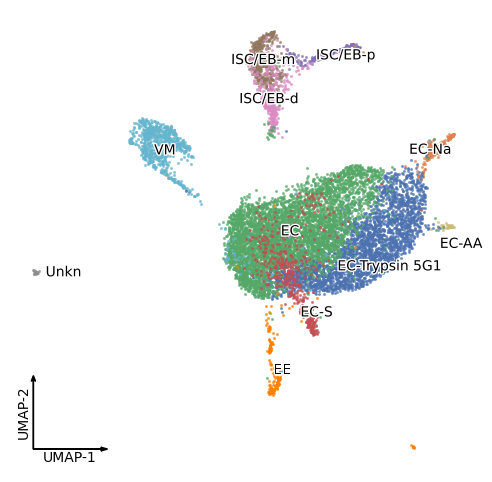

In [184]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

c = sns.color_palette('deep')
set1 = sns.color_palette('Set1')

grp_color = {
    'ISC/EB-p': c[4],
    'ISC/EB-m': c[5],
    'ISC/EB-d': c[6],
    'EC-AA': c[-2],
    'EC-Na': c[1],
    'EC': c[2],
    'EC-Trypsin 5G1': c[0],
    'EC-S': c[3],
    'EE': set1[4],
    'VM': c[-1],
    'Unkn': c[-3],
}

for lb in labels:
    pdf = umap[
        umap.index.isin(adata_sgl.obs.index)
    ][adata_sgl.obs['label'] == lb]
    l1, = ax.plot(
        pdf['umap1'], pdf['umap2'], '.', color=grp_color[lb],
        alpha=0.6, ms=2.5) #e7e7e7

    x, y = np.mean(pdf[['umap1', 'umap2']].values, axis=0)
    
    if lb == 'EC-S':
        txt = ax.text(x + 1, y - 2, lb, ha='center', va='center')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=2, foreground='w')])
    elif lb == 'Unkn':
        txt = ax.text(x + 1.25, y, lb, ha='center', va='center')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=2, foreground='w')])
    elif lb == 'EC-AA':
        txt = ax.text(x + 1, y - 1, lb, ha='center', va='center')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=2, foreground='w')])
    elif lb == 'EC-Trypsin 5G1':
        txt = ax.text(x + 1.5, y - 1, lb, ha='center', va='center')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=2, foreground='w')])
    elif lb == 'ISC/EB-p':
        txt = ax.text(x + 1, y, lb, ha='center', va='center')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=2, foreground='w')])
    else:
        txt = ax.text(x, y, lb, ha='center', va='center')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=2, foreground='w')])
    

# pdf = umap[
#     umap.index.isin(adata_sgl.obs.index)
# ][adata_sgl.obs['sp'] == 'midgut 10d']
# l2, = ax.plot(pdf['umap1'], pdf['umap2'], '.', color=c[3], alpha=0.6, ms=2.5)

ax.arrow(
    -12, -12, 0, 3.5, 
    width=0.01, head_width=0.2, overhang=0.3, 
    color='k', zorder=10)
ax.arrow(
    -12, -12, 3, 0, 
    width=0.01, head_width=0.2, overhang=0.3,
    color='k', zorder=10)

ax.set_axis_off()

ax.text(-10.4, -12.1, 'UMAP-1', ha='center', va='top')
ax.text(-12.1, -10.1, 'UMAP-2', ha='right', va='center', rotation=90)



# ax.plot(-12, 9, '.', color=c[0], mec=c[0], ms=11, alpha=0.9)
# ax.text(-11.5, 9, 'midgut 10d', ha='left', va='center')

plt.savefig('./plots/f2.clust.umap.png', dpi=600, bbox_inches='tight')

In [46]:
marks = markn[markn['Symbol'].map(lambda x: not x in 'LOC5571828')]
marks['grp'] = ['ISC/EB-p', 'ISC/EB', 'EC-Na', 'EC-AA', 'EC-Trypsin 5G1', 'EC-S', 'EE', 'VM', 'Unkn']
marks['title'] = marks.apply(lambda x: x['Symbol'] + ' (' + x['grp'] + ')', axis=1)
marks['des'] = marks.apply(lambda x: 'Gene Name: ' + x['gname'] + '\nDescription:\n' + x['description'], axis=1)
marks

/tmp/ipykernel_90445/3697022905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marks['grp'] = ['ISC/EB-p', 'ISC/EB', 'EC-Na', 'EC-AA', 'EC-Trypsin 5G1', 'EC-S', 'EE', 'VM', 'Unkn']
/tmp/ipykernel_90445/3697022905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marks['title'] = marks.apply(lambda x: x['Symbol'] + ' (' + x['grp'] + ')', axis=1)
/tmp/ipykernel_90445/3697022905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Symbol,Aliases,description,gname,grp,title,des
LOC5567214,LOC5567214,"AaeL_AAEL000864, AAEL000864",transcription factor SOX-3,AAEL000864,ISC/EB-p,LOC5567214 (ISC/EB-p),Gene Name: AAEL000864\nDescription:\ntranscrip...
LOC110676293,LOC110676293,"AaeL_AAEL003723, AAEL003723, LYSC11",lysozyme-like,LYSC11,ISC/EB,LOC110676293 (ISC/EB),Gene Name: LYSC11\nDescription:\nlysozyme-like
LOC5570922,LOC5570922,"AaeL_AAEL001503, AAEL001503, NHE3",sodium/hydrogen exchanger 3,NHE3,EC-Na,LOC5570922 (EC-Na),Gene Name: NHE3\nDescription:\nsodium/hydrogen...
LOC5570613,LOC5570613,"AaeL_AAEL008424, AAEL008424, NAAT",sodium-dependent nutrient amino acid transport...,NAAT,EC-AA,LOC5570613 (EC-AA),Gene Name: NAAT\nDescription:\nsodium-dependen...
LOC5578506,LOC5578506,"AaeL_AAEL013707, AAEL013707",trypsin 5G1-like,AAEL013707,EC-Trypsin 5G1,LOC5578506 (EC-Trypsin 5G1),Gene Name: AAEL013707\nDescription:\ntrypsin 5...
LOC5565453,LOC5565453,"AaeL_AAEL000667, AAEL000667",probable maltase,AAEL000667,EC-S,LOC5565453 (EC-S),Gene Name: AAEL000667\nDescription:\nprobable ...
LOC5575886,LOC5575886,"AaeL_AAEL002733, AAEL002733, AeaNPF, NPF, NPF_...",neuropeptide F,NPF,EE,LOC5575886 (EE),Gene Name: NPF\nDescription:\nneuropeptide F
LOC5580168,LOC5580168,"AaeL_AAEL002565, AAEL002558, AAEL002565",twitchin,AAEL002565,VM,LOC5580168 (VM),Gene Name: AAEL002565\nDescription:\ntwitchin
LOC5570587,LOC5570587,"AaeL_AAEL008397, AAEL008397, GPXH2, GPx",probable glutathione peroxidase 2,GPx,Unkn,LOC5570587 (Unkn),Gene Name: GPx\nDescription:\nprobable glutath...


/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


<Figure size 900x900 with 0 Axes>

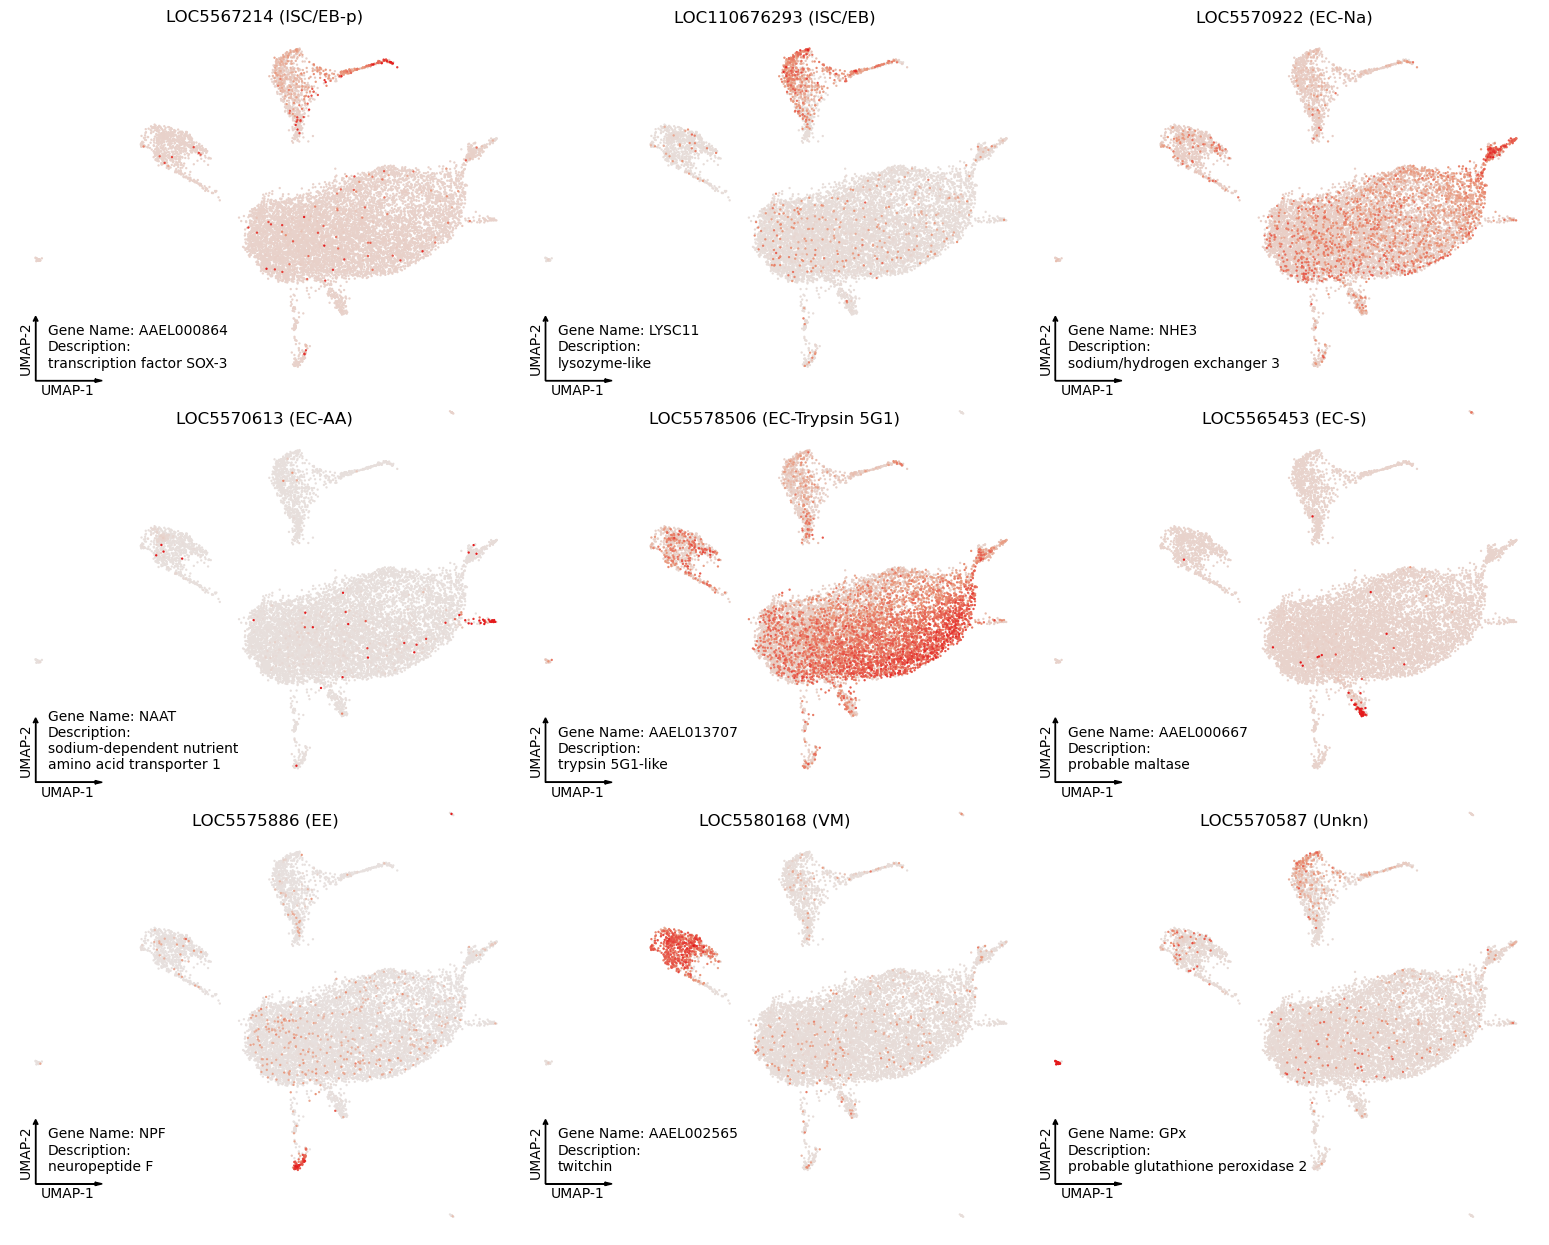

In [48]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

c = sns.color_palette('Set1')

cvals  = [-2., 0,  2]
raw_colors = ["#e7e7e7", "darksalmon", c[0]]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), raw_colors))
cmap = colors.LinearSegmentedColormap.from_list("", tuples)

plt.figure(figsize=(9,9))

axes = sc.pl.umap(
    adata_sgl, 
    color=marks['Symbol'], 
    use_raw=False, 
    color_map=cmap, 
    show=False, 
    frameon=False, 
    colorbar_loc=None,
    ncols=3,
    wspace=0,
    hspace=0,
    title=marks['title'],
)

for ax, des in zip(axes, marks['des']):
    ax.arrow(
        -12, -10, 0, 3.5, 
        width=0.01, head_width=0.2, overhang=0.3, 
        color='k', zorder=10)
    ax.arrow(
        -12, -10, 2.4, 0, 
        width=0.01, head_width=0.2, overhang=0.3,
        color='k', zorder=10)

    ax.text(-11.8, -10.2, 'UMAP-1', ha='left', va='top')
    ax.text(-12.1, -8.1, 'UMAP-2', ha='right', va='center', rotation=90)

    if des.endswith('transporter 1'):
        des = """Gene Name: NAAT
Description:
sodium-dependent nutrient 
amino acid transporter 1"""

    ax.text(-11.5, -9.4, des, ha='left', va='bottom')

plt.savefig('./plots/f2.exp.umap.png', dpi=600, bbox_inches='tight')